# Project 11: Chapter 8: Advanced Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("fraserDataWithRGDPPC.csv",
                  index_col = ["ISO_Code_3", "Year"],
                  parse_dates = True).rename(columns = {"Summary":"EFW"})
data.tail()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\3579266558.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("fraserDataWithRGDPPC.csv",


ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
ZWE        2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   
           2019-01-01                          4.026568     1.413372   
           2020-01-01                          3.965267     1.250000   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
ZWE        2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   
           2019-01-01                          6.397045    6.132583   
           2020-01-01                          5.565207    6.080774   

                       Standard Deviation of the 5 EFW Areas  RGDP Per Capita  
ISO_Code_3 Year                                                                
ZWE        2016-01-01                               1.498126        1534.0000  
           2017-01-01                               1.631512        1582.3662  
           2018-01-01                               1.262218        1611.4052  
           2019-01-01                               2.064439              NaN  
           2020-01-01                               1.975388              NaN

In [2]:
years = data.index.get_level_values("Year").unique()
countries = data.index.get_level_values("ISO_Code_3").unique()
years, countries

(DatetimeIndex(['1970-01-01', '1975-01-01', '1980-01-01', '1985-01-01',
                '1990-01-01', '1995-01-01', '2000-01-01', '2001-01-01',
                '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
                '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
                '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
                '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
                '2018-01-01', '2019-01-01', '2020-01-01'],
               dtype='datetime64[ns]', name='Year', freq=None),
 Index(['AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
        ...
        'UGA', 'UKR', 'URY', 'USA', 'VEN', 'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
       dtype='object', name='ISO_Code_3', length=165))

In [3]:
data.index

MultiIndex([('AGO', '1970-01-01'),
            ('AGO', '1975-01-01'),
            ('AGO', '1980-01-01'),
            ('AGO', '1985-01-01'),
            ('AGO', '1990-01-01'),
            ('AGO', '1995-01-01'),
            ('AGO', '2000-01-01'),
            ('AGO', '2001-01-01'),
            ('AGO', '2002-01-01'),
            ('AGO', '2003-01-01'),
            ...
            ('ZWE', '2011-01-01'),
            ('ZWE', '2012-01-01'),
            ('ZWE', '2013-01-01'),
            ('ZWE', '2014-01-01'),
            ('ZWE', '2015-01-01'),
            ('ZWE', '2016-01-01'),
            ('ZWE', '2017-01-01'),
            ('ZWE', '2018-01-01'),
            ('ZWE', '2019-01-01'),
            ('ZWE', '2020-01-01')],
           names=['ISO_Code_3', 'Year'], length=4455)

In [4]:
def create_indicator_variable(data, indicator_name,
                              index_name, target_index_list):
    data[indicator_name] = 0
    for index in target_index_list:
        data.loc[data.index.get_level_values(index_name) == index, [indicator_name]] = 1
# slect ISO_Code_3
index_name = data.index.names[0]
indicator_name = "North America"
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV", 
                              "GTM", "HTI", "HND", "JAM","MEX", "NIC", "PAN",
                              "TTO", "USA"]
create_indicator_variable(data = data,
                          indicator_name = indicator_name,
                          index_name = index_name,
                          target_index_list = countries_in_north_america)
data.tail()

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
ZWE        2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   
           2019-01-01                          4.026568     1.413372   
           2020-01-01                          3.965267     1.250000   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
ZWE        2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   
           2019-01-01                          6.397045    6.132583   
           2020-01-01                          5.565207    6.080774   

                       Standard Deviation of the 5 EFW Areas  RGDP Per Capita  \
ISO_Code_3 Year                                                                 
ZWE        2016-01-01                               1.498126        1534.0000   
           2017-01-01                               1.631512        1582.3662   
           2018-01-01                               1.262218        1611.4052   
           2019-01-01                               2.064439              NaN   
           2020-01-01                               1.975388              NaN   

                       North America  
ISO_Code_3 Year                       
ZWE        2016-01-01              0  
           2017-01-01              0  
           2018-01-01              0  
           2019-01-01              0  
           2020-01-01              0

In [5]:
# alternate strategy using pandas features
data.loc[countries_in_north_america, "North America"] = 1
data.loc[countries_in_north_america, "North America"]

ISO_Code_3  Year      
BHS         1970-01-01    1
            1975-01-01    1
            1980-01-01    1
            1985-01-01    1
            1990-01-01    1
                         ..
USA         2016-01-01    1
            2017-01-01    1
            2018-01-01    1
            2019-01-01    1
            2020-01-01    1
Name: North America, Length: 432, dtype: int64

In [6]:
data.loc[countries_in_north_america]["Countries"].unique()

array(['Bahamas, The', 'Barbados', 'Belize', 'Canada', 'Costa Rica',
       'Dominican Republic', 'El Salvador', 'Guatemala', 'Haiti',
       'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama',
       'Trinidad and Tobago', 'United States'], dtype=object)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\3684116225.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm', 2)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\3684116225.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])


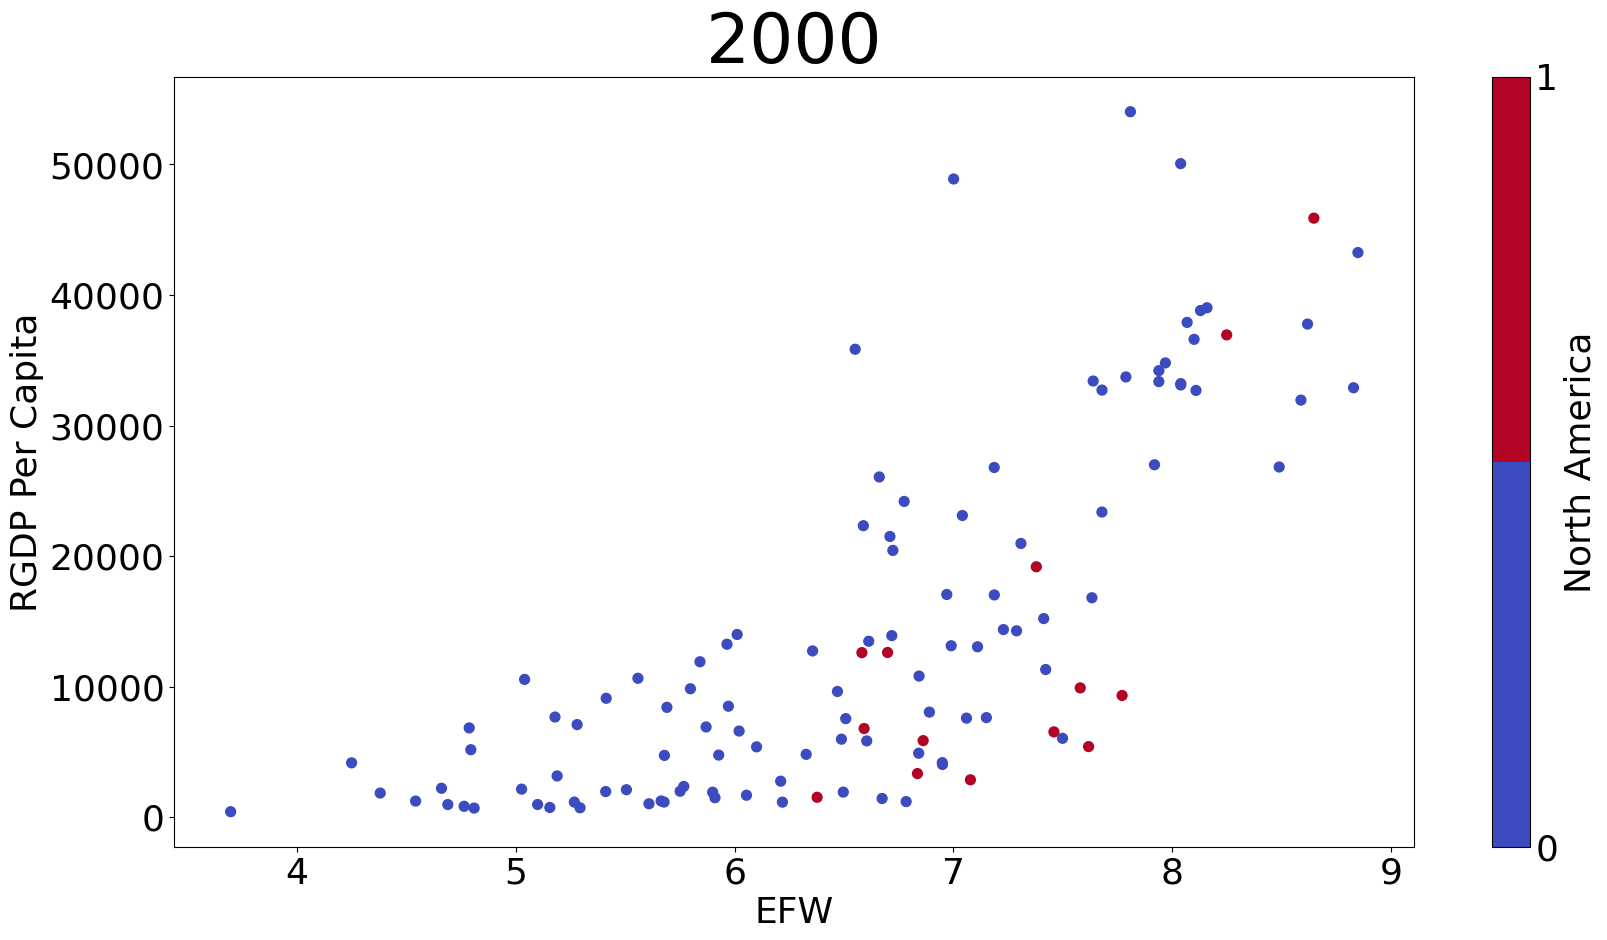

In [7]:
import datetime
from matplotlib import cm
plt.rcParams.update({"font.size":26})
year = 2000
 ###### Discretize the Colorbar ############
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
############################################
plot_data = data[data.index.get_level_values("Year") == datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (20,10))
plot_data.plot.scatter(x = "EFW", 
                       y = "RGDP Per Capita",
                       c = "North America",
                       #### Make sure to use cmap=cmap, not cmap="coolwarm"
                       cmap = cmap,
                       s = 50, 
                       ax = ax)
ax.set_title(str(year), fontsize = 50)
##### Only include 1 and 0 for cbar values, romve tick lines ########
f = plt.gcf()
cax = f.get_axes()[1]
vals = cax.get_yticks()
cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])
cax.tick_params(length = 0)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\666937959.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm', 2)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\666937959.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])


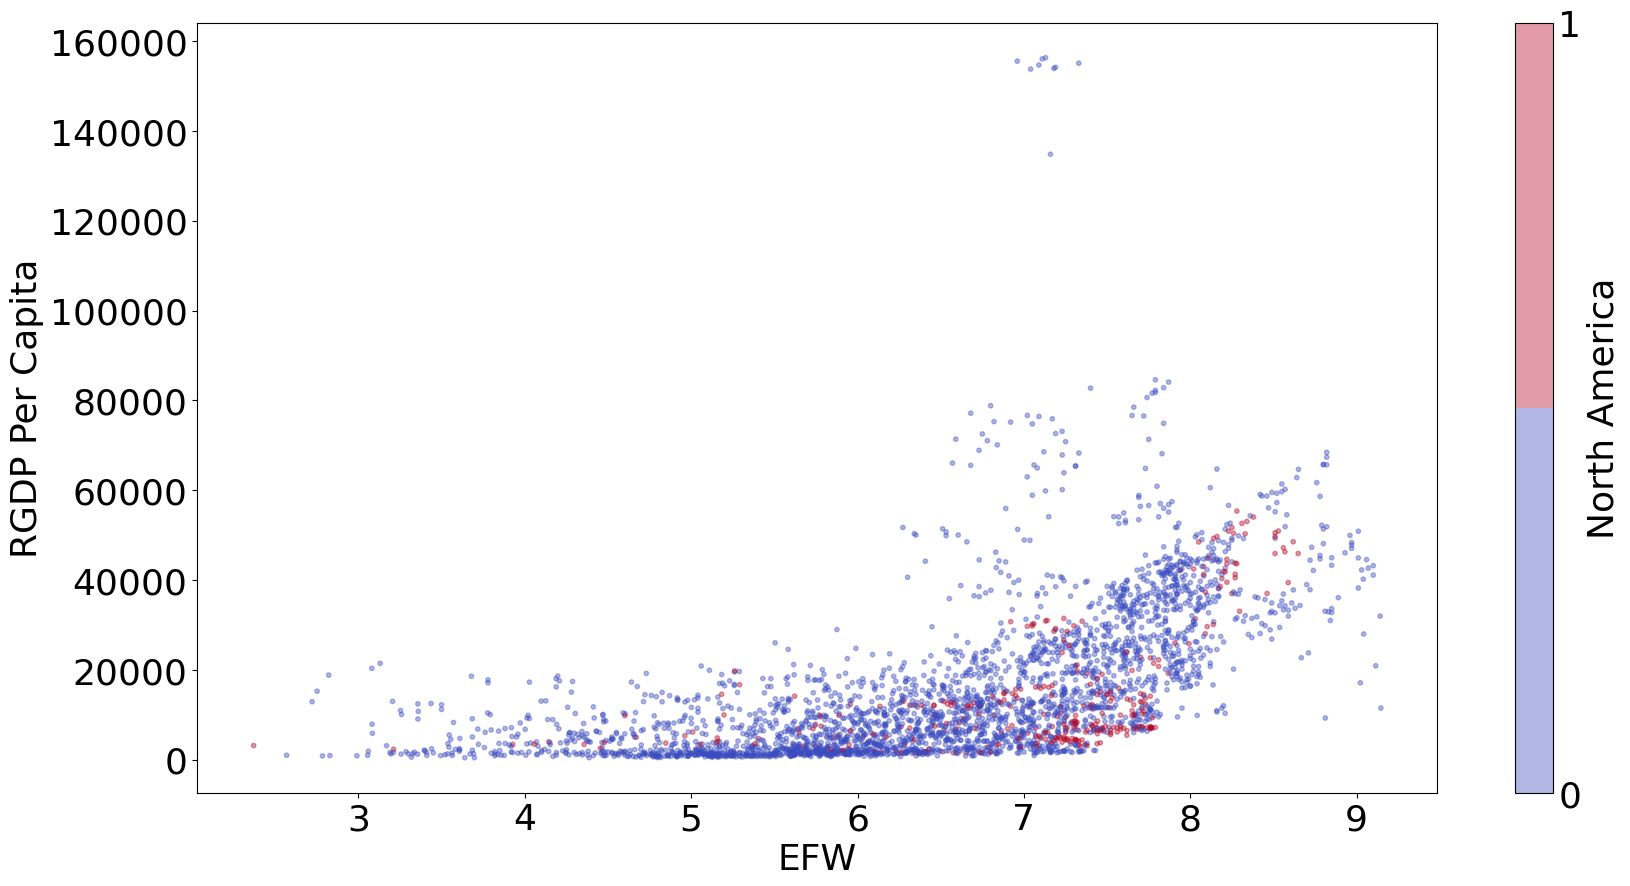

In [8]:
import datetime
from matplotlib import cm
plt.rcParams.update({"font.size":26})
 ###### Discretize the Colorbar ############
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
############################################
plot_data = data
fig, ax = plt.subplots(figsize = (20,10))
plot_data.plot.scatter(x = "EFW", 
                       y = "RGDP Per Capita",
                       c = "North America",
                       #### Make sure to use cmap=cmap, not cmap="coolwarm"
                       cmap = cmap,
                       s = 10, 
                       alpha = .4,
                       ax = ax)
##### Only include 1 and 0 for cbar values, romve tick lines ########
f = plt.gcf()
cax = f.get_axes()[1]
vals = cax.get_yticks()
cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])
cax.tick_params(length = 0)

In [9]:
n = 5
quantile_var = "RGDP Per Capita"
quantile_name = quantile_var + " " + str(n) + "-tile"
data[quantile_name] = np.nan

In [10]:
def create_quantile(n,
                    data,
                    year,
                    quantile_var,
                    quantile_name):
    year_index = data.index.get_level_values("Year") == year
    # identify quantiles by year
    quantile_values_dict = {i:data[year_index][quantile_var].quantile(i/n) for i in range(1, n+1)}
    for index in data[year_index].index:
        val = data.loc[index][quantile_var]
        for i in range(1, n + 1):
            if val <= quantile_values_dict[i]:
                data.loc[index, [quantile_name]] = int((n + 1) - i)
                break
            else:
                continue
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)

In [11]:
# data.loc[["USA", "GBR"], "RGDP Per Capita 5-tile"]
data.tail()

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
ZWE        2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   
           2019-01-01                          4.026568     1.413372   
           2020-01-01                          3.965267     1.250000   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
ZWE        2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   
           2019-01-01                          6.397045    6.132583   
           2020-01-01                          5.565207    6.080774   

                       Standard Deviation of the 5 EFW Areas  RGDP Per Capita  \
ISO_Code_3 Year                                                                 
ZWE        2016-01-01                               1.498126        1534.0000   
           2017-01-01                               1.631512        1582.3662   
           2018-01-01                               1.262218        1611.4052   
           2019-01-01                               2.064439              NaN   
           2020-01-01                               1.975388              NaN   

                       North America  RGDP Per Capita 5-tile  
ISO_Code_3 Year                                               
ZWE        2016-01-01              0                     5.0  
           2017-01-01              0                     5.0  
           2018-01-01              0                     5.0  
           2019-01-01              0                     NaN  
           2020-01-01              0                     NaN

In [12]:
data["RGDP Per Capita"].groupby("Year").quantile([.2,.4,.6,.8,1])
# data["RGDP Per Capita"].median()

Year           
1970-01-01  0.2     1468.0
            0.4     2847.8
            0.6     5847.6
            0.8    10137.6
            1.0    51921.0
                    ...   
2020-01-01  0.2        NaN
            0.4        NaN
            0.6        NaN
            0.8        NaN
            1.0        NaN
Name: RGDP Per Capita, Length: 135, dtype: float64

C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\978437600.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("jet", n)


Text(0.5, 1.0, 'Year: 2016')

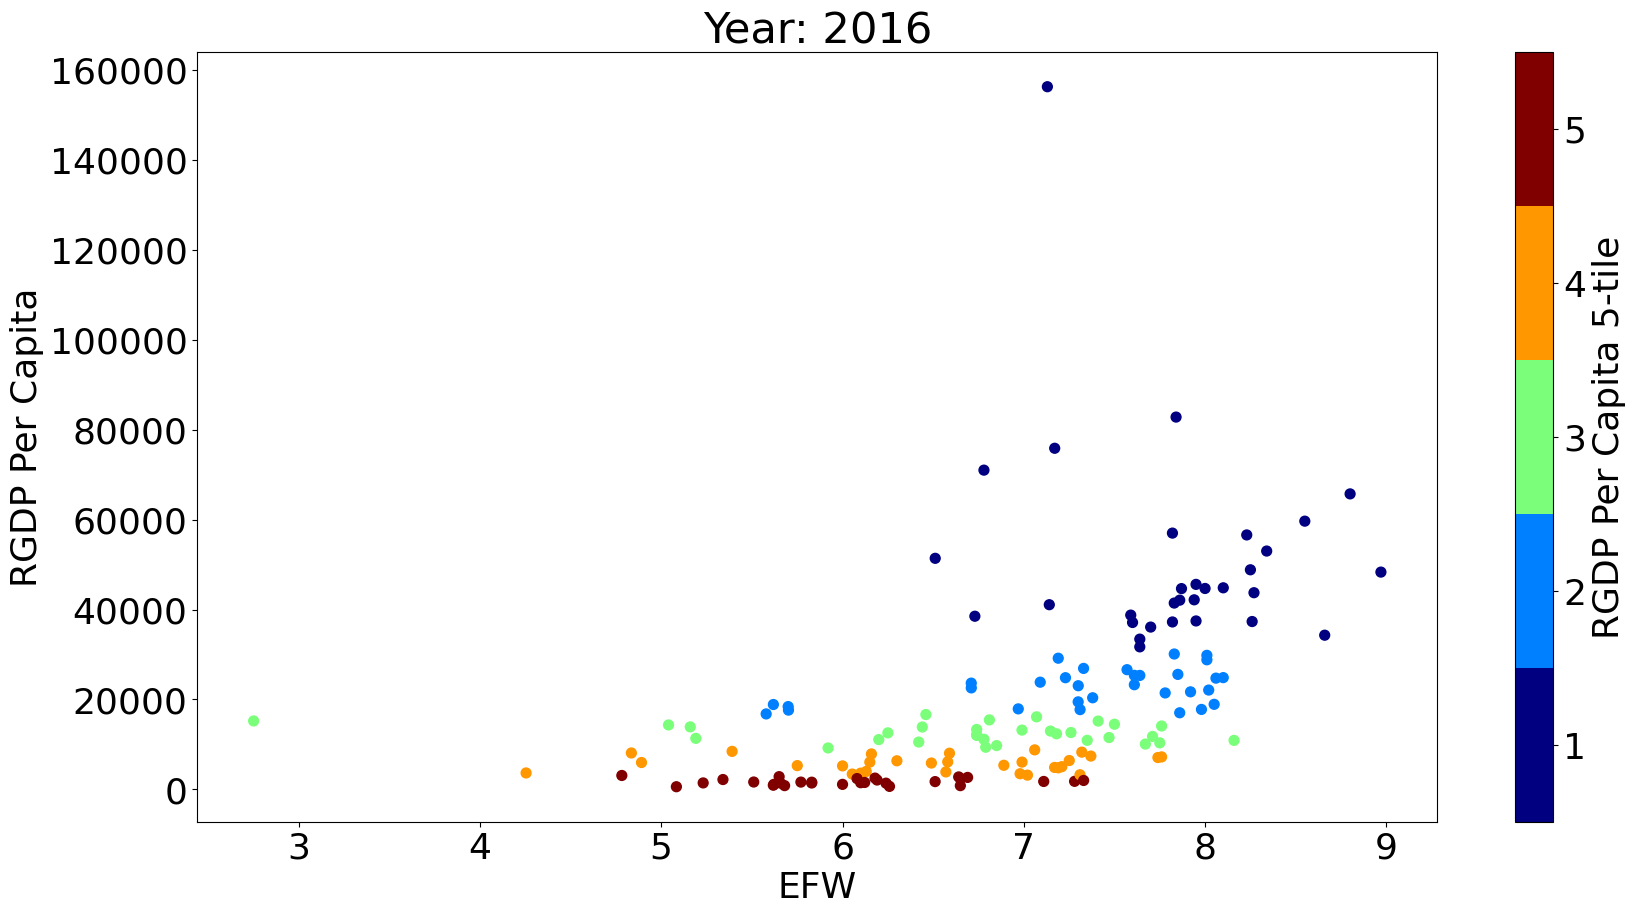

In [13]:
year = 2016
plot_data = data[data.index.get_level_values("Year") == datetime.datetime(year, 1,1)]
fig, ax = plt.subplots(figsize = (20,10))
norm = cm.colors.Normalize()
cmap = cm.get_cmap("jet", n)

plot_data.plot.scatter(x="EFW", 
                       y = "RGDP Per Capita",
                       c = "RGDP Per Capita " + str(n) + "-tile",
                       cmap = cmap,
                       ax = ax, s = 50,
                       legend =False, vmin = 0.5, vmax = 5.5)
ax.set_title(f"Year: {year}")

## Constructing Lagged Observations

In [14]:
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code_3")["RGDP Per Capita"].shift()
data.loc["USA"].head()

,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,EFW,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas,RGDP Per Capita,North America,RGDP Per Capita 5-tile,RGDP Per Capita Lag
Year,,,,,,,,,,,,,,,
1970-01-01,US,North America,NaN,United States,7.615181,5.341231,8.286741,9.588817,8.232334,6.631262,1.648185,23958.0,1,1.0,NaN
1975-01-01,US,North America,NaN,United States,7.907324,5.336851,8.670280,9.067438,8.412407,8.042706,1.483975,25956.0,1,1.0,23958.0
1980-01-01,US,North America,NaN,United States,8.101368,5.788734,8.684269,9.122306,8.544966,8.359863,1.322304,29611.0,1,1.0,25956.0
1985-01-01,US,North America,NaN,United States,8.295413,6.582616,8.726823,9.339660,8.505198,8.335644,1.031484,33023.0,1,1.0,29611.0
1990-01-01,US,North America,H,United States,8.461126,7.262163,8.350956,9.669842,8.537828,8.477998,0.853932,36982.0,1,1.0,33023.0


In [15]:
years_from_2000 = data.index.get_level_values("Year") > datetime.datetime(1999,1,1)
data[years_from_2000].loc["GBR"]

,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,EFW,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas,RGDP Per Capita,North America,RGDP Per Capita 5-tile,RGDP Per Capita Lag
Year,,,,,,,,,,,,,,,
2000-01-01,GB,Europe & Central Asia,H,United Kingdom,8.588978,7.094016,8.436520,9.301871,9.388696,8.675363,0.923704,31946.0363,0,1.0,27861.2158
2001-01-01,GB,Europe & Central Asia,H,United Kingdom,8.508987,6.861468,8.467307,9.534175,9.251954,8.411201,1.040260,32660.4414,0,1.0,31946.0363
2002-01-01,GB,Europe & Central Asia,H,United Kingdom,8.588978,7.039989,8.386749,9.687376,9.257991,8.533949,1.012058,33271.3025,0,1.0,32660.4414
2003-01-01,GB,Europe & Central Asia,H,United Kingdom,8.568980,6.939693,8.415994,9.554882,9.318062,8.564115,1.025986,34232.4267,0,1.0,33271.3025
2004-01-01,GB,Europe & Central Asia,H,United Kingdom,8.488990,6.918936,8.331910,9.565920,9.009034,8.609768,0.991783,34865.7827,0,1.0,34232.4267
2005-01-01,GB,Europe & Central Asia,H,United Kingdom,8.449041,6.823132,8.413372,9.551954,8.902724,8.538042,1.009327,35623.6256,0,1.0,34865.7827
2006-01-01,GB,Europe & Central Asia,H,United Kingdom,8.389119,6.814850,8.293865,9.444472,8.870425,8.501961,0.980494,36214.0688,0,1.0,35623.6256
2007-01-01,GB,Europe & Central Asia,H,United Kingdom,8.289249,6.830015,8.091541,9.333523,8.833803,8.336097,0.943081,36816.6771,0,1.0,36214.0688
2008-01-01,GB,Europe & Central Asia,H,United Kingdom,8.169404,6.421141,8.173346,9.262539,8.788923,8.219933,1.076762,36264.7906,0,1.0,36816.6771


## Calculating Logged Differences with Panel

In [16]:
diff_keys = ['EFW',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']
data_dict = {}
data_dict["Data"] = data[diff_keys]
# use logged data for RGDP Per Capita
# difference log RGDP Per Capita and use EFW Levels
data_dict["Data"]["RGDP Per Capita"] = np.log(data["RGDP Per Capita"]).groupby("ISO_Code_3").diff()
# create all lags
for key, df in data_dict.items():
    data_dict[key][[k + " Lag" for k in diff_keys]] = df[diff_keys].groupby("ISO_Code_3").shift()
    
# 2 difference log RGDP Per Capita and 1 difference EFW
data_dict["Diff"] = data_dict["Data"].groupby("ISO_Code_3").diff()

# select only years from 2000 onward, then drop any remaining rows with null observations
for key, df in data_dict.items():
    data_dict[key] = df[years_from_2000].dropna()
    
data_dict["Diff"].loc["USA"]


C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\2493725732.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dict["Data"]["RGDP Per Capita"] = np.log(data["RGDP Per Capita"]).groupby("ISO_Code_3").diff()
C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\2493725732.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dict[key][[k + " Lag" for k in diff_keys]] = df[diff_keys].groupby("ISO_Code_3").shift()
C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\2493725732.py:15: SettingWithCopyWarning

,EFW,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita,EFW Lag,Size of Government Lag,Legal System and Property Rights Lag,Sound Money Lag,Freedom to Trade Internationally Lag,Regulation Lag,RGDP Per Capita Lag
Year,,,,,,,,,,,,,,
2000-01-01,0.059642,0.258157,0.185300,-0.180266,-0.127610,0.200646,0.089546,0.127309,0.184405,0.236914,0.118089,0.056383,0.060842,-0.050130
2001-01-01,-0.139005,-0.183407,-0.158012,0.004363,-0.069599,-0.275467,-0.152827,0.059642,0.258157,0.185300,-0.180266,-0.127610,0.200646,0.089546
2002-01-01,0.059573,0.152217,-0.245031,0.112282,-0.098091,0.355861,0.008612,-0.139005,-0.183407,-0.158012,0.004363,-0.069599,-0.275467,-0.152827
2003-01-01,-0.009929,0.192747,-0.112748,0.019179,0.039553,-0.157593,0.010662,0.059573,0.152217,-0.245031,0.112282,-0.098091,0.355861,0.008612
2004-01-01,0.059573,0.204994,-0.118081,0.009945,0.040340,0.124543,0.008820,-0.009929,0.192747,-0.112748,0.019179,0.039553,-0.157593,0.010662
2005-01-01,-0.108967,-0.178444,-0.201465,-0.049332,-0.088934,-0.050620,-0.004229,0.059573,0.204994,-0.118081,0.009945,0.040340,0.124543,0.008820
2006-01-01,0.000000,-0.021107,-0.063554,-0.054068,0.015563,0.125442,-0.007002,-0.108967,-0.178444,-0.201465,-0.049332,-0.088934,-0.050620,-0.004229
2007-01-01,0.019975,-0.047304,0.103417,-0.044105,0.023656,0.072361,-0.008554,0.000000,-0.021107,-0.063554,-0.054068,0.015563,0.125442,-0.007002
2008-01-01,-0.199749,-0.549849,-0.069686,-0.091004,-0.058436,-0.242293,-0.020499,0.019975,-0.047304,0.103417,-0.044105,0.023656,0.072361,-0.008554


In [17]:
inidcator_name = "North America"
index_name = "ISO_Code_3"
# df refers to actual dataframe in dictionary, not just a copy
## therefore, the function actually operates on df, not just a copy that will disappear
for key, df in data_dict.items():  
    create_indicator_variable(data = df, indicator_name = indicator_name,  
        index_name = index_name,target_index_list = countries_in_north_america) 
data_dict["Data"][data_dict["Data"]["North America"] == True].tail()

EFW  Size of Government  \
ISO_Code_3 Year                                       
USA        2014-01-01  8.249649            7.239681   
           2015-01-01  8.309574            7.237673   
           2016-01-01  8.339536            7.252009   
           2017-01-01  8.379486            7.354358   
           2018-01-01  8.279612            7.409095   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
USA        2014-01-01                          7.652463     9.737154   
           2015-01-01                          7.745733     9.855788   
           2016-01-01                          7.793107     9.814703   
           2017-01-01                          7.802657     9.772320   
           2018-01-01                          7.646530     9.772494   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
USA        2014-01-01                          7.836022    8.792114   
           2015-01-01                          7.810632    8.891698   
           2016-01-01                          7.889129    8.952382   
           2017-01-01                          7.921225    9.031901   
           2018-01-01                          7.783384    8.784245   

                       RGDP Per Capita   EFW Lag  Size of Government Lag  \
ISO_Code_3 Year                                                            
USA        2014-01-01         0.015625  8.229674                7.015350   
           2015-01-01         0.017784  8.249649                7.239681   
           2016-01-01         0.008030  8.309574                7.237673   
           2017-01-01         0.018553  8.339536                7.252009   
           2018-01-01         0.024273  8.379486                7.354358   

                       Legal System and Property Rights Lag  Sound Money Lag  \
ISO_Code_3 Year                                                                
USA        2014-01-01                              7.592930         9.824240   
           2015-01-01                              7.652463         9.737154   
           2016-01-01                              7.745733         9.855788   
           2017-01-01                              7.793107         9.814703   
           2018-01-01                              7.802657         9.772320   

                       Freedom to Trade Internationally Lag  Regulation Lag  \
ISO_Code_3 Year                                                               
USA        2014-01-01                              7.964254        8.736168   
           2015-01-01                              7.836022        8.792114   
           2016-01-01                              7.810632        8.891698   
           2017-01-01                              7.889129        8.952382   
           2018-01-01                              7.921225        9.031901   

                       RGDP Per Capita Lag  North America  
ISO_Code_3 Year                                            
USA        2014-01-01             0.009264              1  
           2015-01-01             0.015625              1  
           2016-01-01             0.017784              1  
           2017-01-01             0.008030              1  
           2018-01-01             0.018553              1

In [18]:
import statsmodels.api as sm
X_names = ["EFW"]
y_name = ["RGDP Per Capita"]
for key, df in data_dict.items():
    reg_data = df.dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    y = reg_data[y_name]
    print(key)
    results = sm.OLS(y, X).fit()
    print(results.summary())
    

Data
                            OLS Regression Results                            
Dep. Variable:        RGDP Per Capita   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.967
Date:                Thu, 25 Apr 2024   Prob (F-statistic):             0.0259
Time:                        12:33:25   Log-Likelihood:                 3767.2
No. Observations:                2577   AIC:                            -7530.
Df Residuals:                    2575   BIC:                            -7519.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EFW            0.0024      0.001      2.229    

C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\2586621010.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\2586621010.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [19]:
import statsmodels.api as sm

X_names = ["EFW", "North America"]
y_name = ["RGDP Per Capita"]
for key, df in data_dict.items():
    reg_data = df.dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    y = reg_data[y_name]
    print(key)
    results = sm.OLS(y, X).fit()
    print(results.summary())


data_dict

Data
                            OLS Regression Results                            
Dep. Variable:        RGDP Per Capita   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.697
Date:                Thu, 25 Apr 2024   Prob (F-statistic):             0.0249
Time:                        12:33:25   Log-Likelihood:                 3768.4
No. Observations:                2577   AIC:                            -7531.
Df Residuals:                    2574   BIC:                            -7513.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
EFW               0.0027      0.001      

C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\2972271427.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\2972271427.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


{'Data':                             EFW  Size of Government  \
 ISO_Code_3 Year                                       
 AGO        2006-01-01  4.531179            5.162277   
            2007-01-01  4.550966            4.963676   
            2008-01-01  4.643633            4.715589   
            2009-01-01  5.251115            7.455501   
            2010-01-01  5.420828            6.310978   
 ...                         ...                 ...   
 ZWE        2014-01-01  5.999147            6.771807   
            2015-01-01  6.449595            6.964753   
            2016-01-01  6.121996            5.332597   
            2017-01-01  5.599886            4.699843   
            2018-01-01  5.876298            5.170946   
 
                        Legal System and Property Rights  Sound Money  \
 ISO_Code_3 Year                                                        
 AGO        2006-01-01                          3.238314     3.807267   
            2007-01-01                     

In [34]:
import statsmodels.api as sm

X_names = ["EFW", "North America", "RGDP Per Capita Lag"]
y_name = ["RGDP Per Capita"]
for key, df in data_dict.items():
    reg_data = df.dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    y = reg_data[y_name]
    print(key)
    results = sm.OLS(y, X).fit()
    print(results.summary())

Data
                            OLS Regression Results                            
Dep. Variable:        RGDP Per Capita   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     130.0
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.97e-78
Time:                        13:13:31   Log-Likelihood:                 3946.6
No. Observations:                2577   AIC:                            -7885.
Df Residuals:                    2573   BIC:                            -7862.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
EFW                     0.001

C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\938768843.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\938768843.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


## Panel Regression

Panel (fixed effects) regression is an OLS that assigns observations for each time period an entity (county, state, country). Thus, we have two ways that we can group observations. We can include an indicator variable for each entity, for each time period, or for both. If we include both, we call this two way fixed effects.

In [23]:
from linearmodels import PanelOLS

In [27]:
data_dict.keys()

dict_keys(['Data', 'Diff'])

In [36]:
reg_data = data_dict["Data"].copy()
X_names = ["EFW", "RGDP Per Capita Lag"]
entity = True
time = True

y = reg_data[y_name]
X = reg_data[X_names]
X["Constant"] = 1
model = PanelOLS(y, X, entity_effects = entity, time_effects = time)
results = model.fit(cov_type="clustered", cluster_entity = True)
results

C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\3099496624.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


Dep. Variable:,RGDP Per Capita,R-squared:,0.0767
Estimator:,PanelOLS,R-squared (Between):,0.2724
No. Observations:,2577,R-squared (Within):,0.0730
Date:,"Thu, Apr 25 2024",R-squared (Overall):,0.0974
Time:,13:15:43,Log-likelihood,4481.8
Cov. Estimator:,Clustered,,
,,F-statistic:,99.922
Entities:,153,P-value,0.0000
Avg Obs:,16.843,Distribution:,"F(2,2404)"
Min Obs:,2.0000,,
Max Obs:,19.000,F-statistic (robust):,13.834


In [43]:
import statsmodels.api as sm

X_names = ["Size of Government", 
          "Legal System and Property Rights", 
          "Sound Money",
          "Freedom to Trade Internationally",
          "Regulation"]
y_name = ["RGDP Per Capita"]
for key, df in data_dict.items():
    reg_data = df.dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    y = reg_data[y_name]
    print(key)
    results = sm.OLS(y, X).fit()
    print(results.summary())

Data
                            OLS Regression Results                            
Dep. Variable:        RGDP Per Capita   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.351
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           7.20e-06
Time:                        13:30:35   Log-Likelihood:                 3780.5
No. Observations:                2577   AIC:                            -7549.
Df Residuals:                    2571   BIC:                            -7514.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Siz

C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\20129109.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\20129109.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\2583884694.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


Data


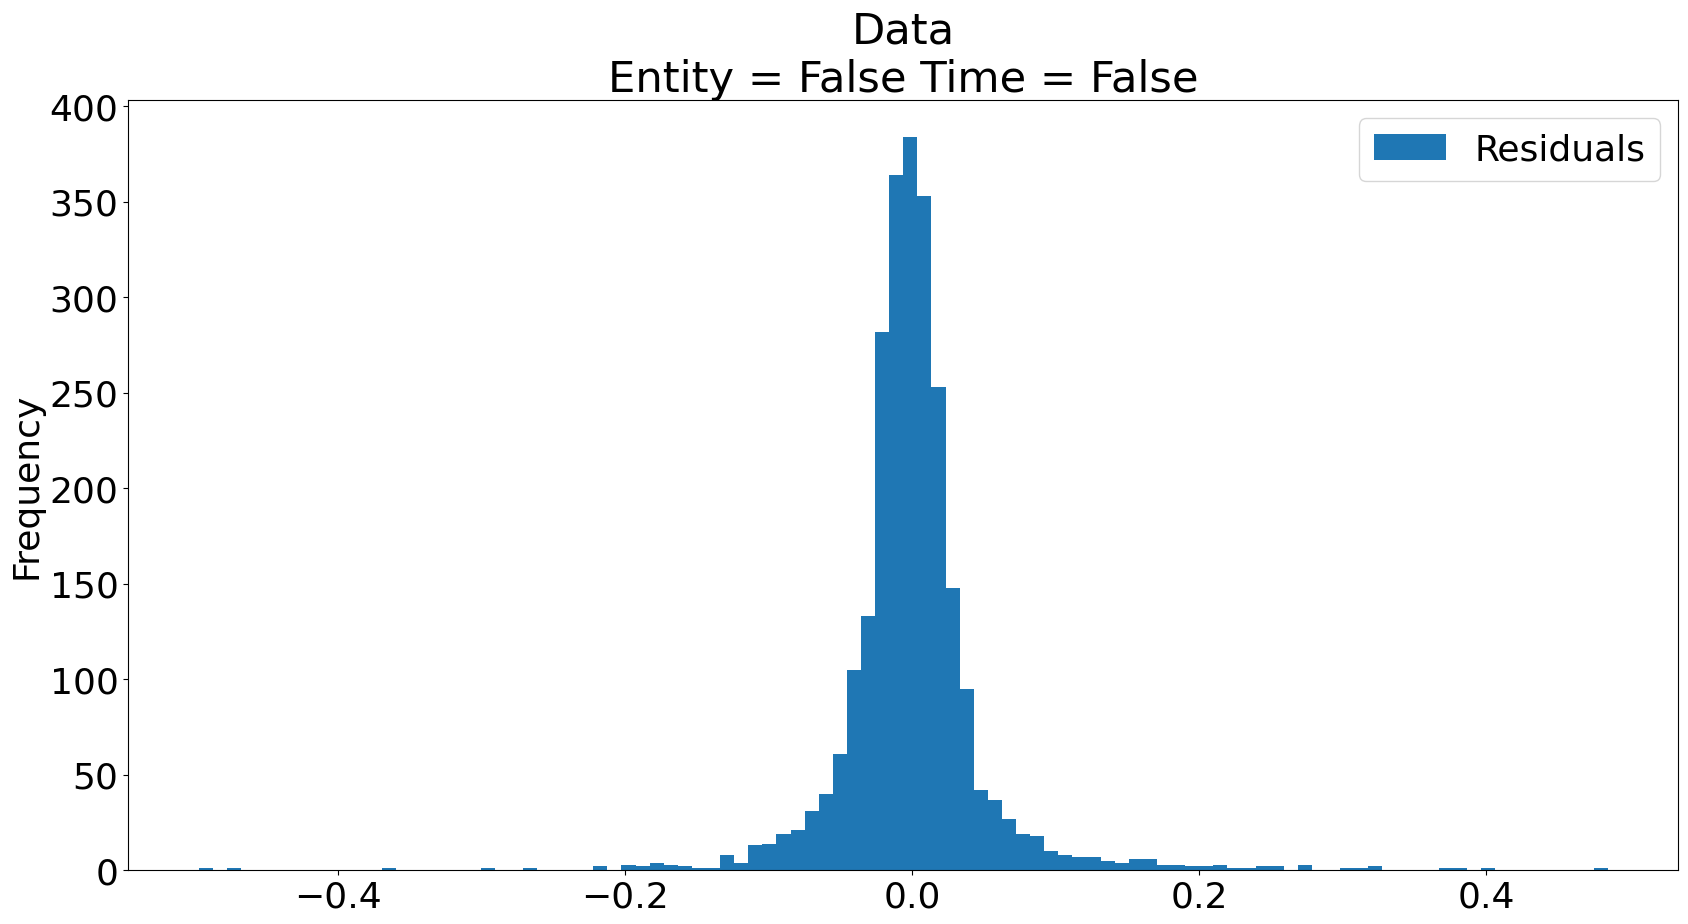

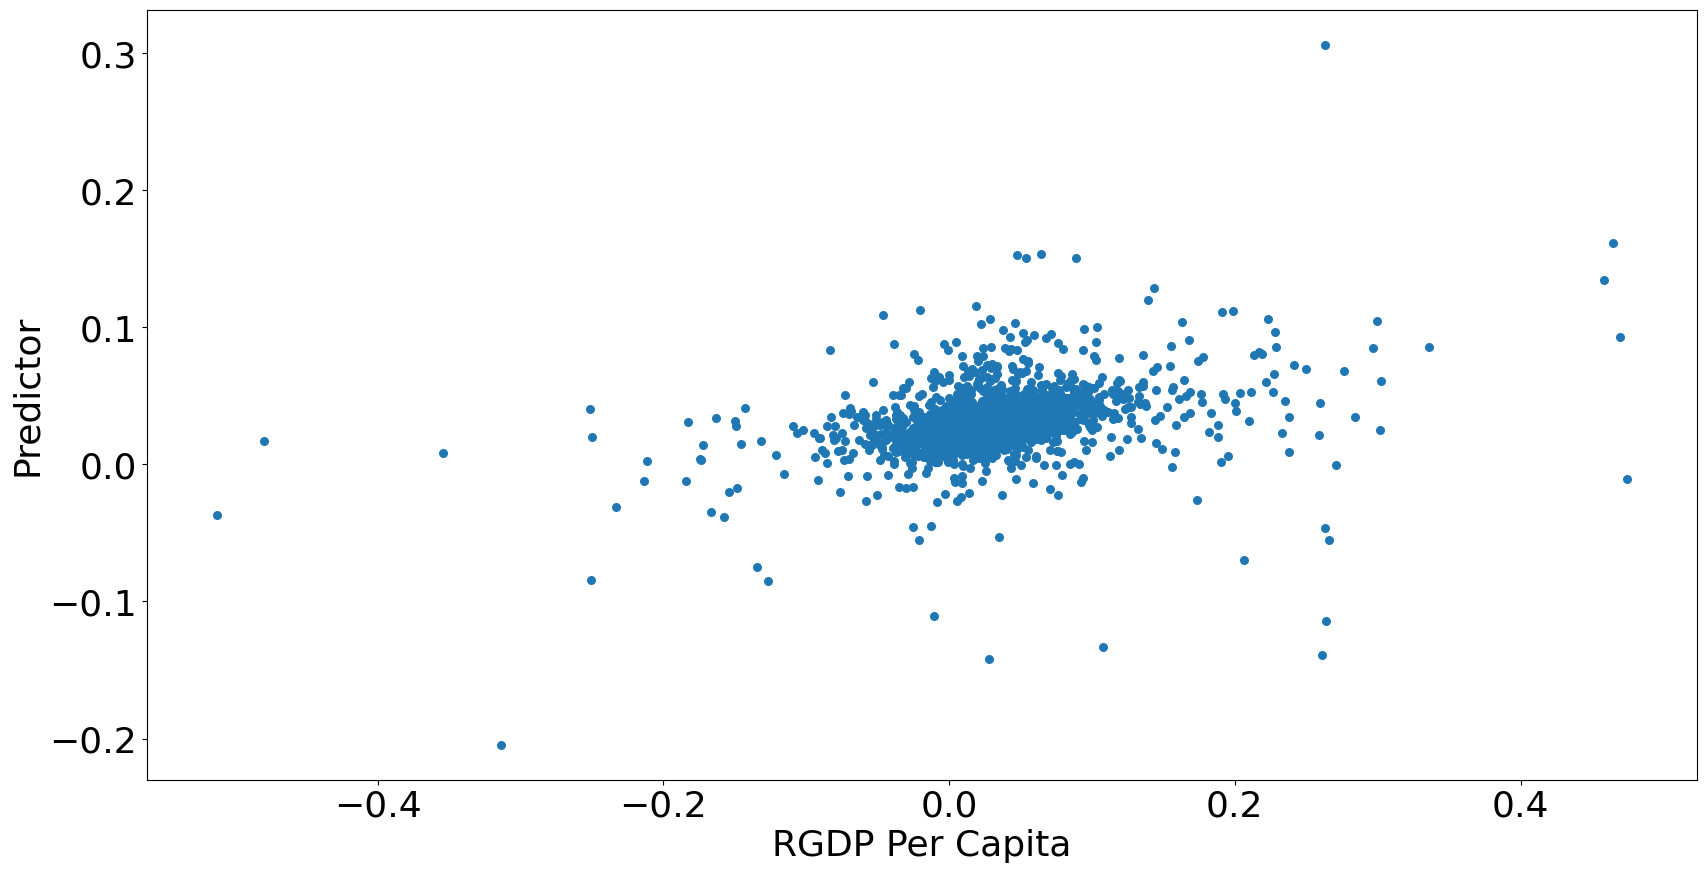

C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\2583884694.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


Diff


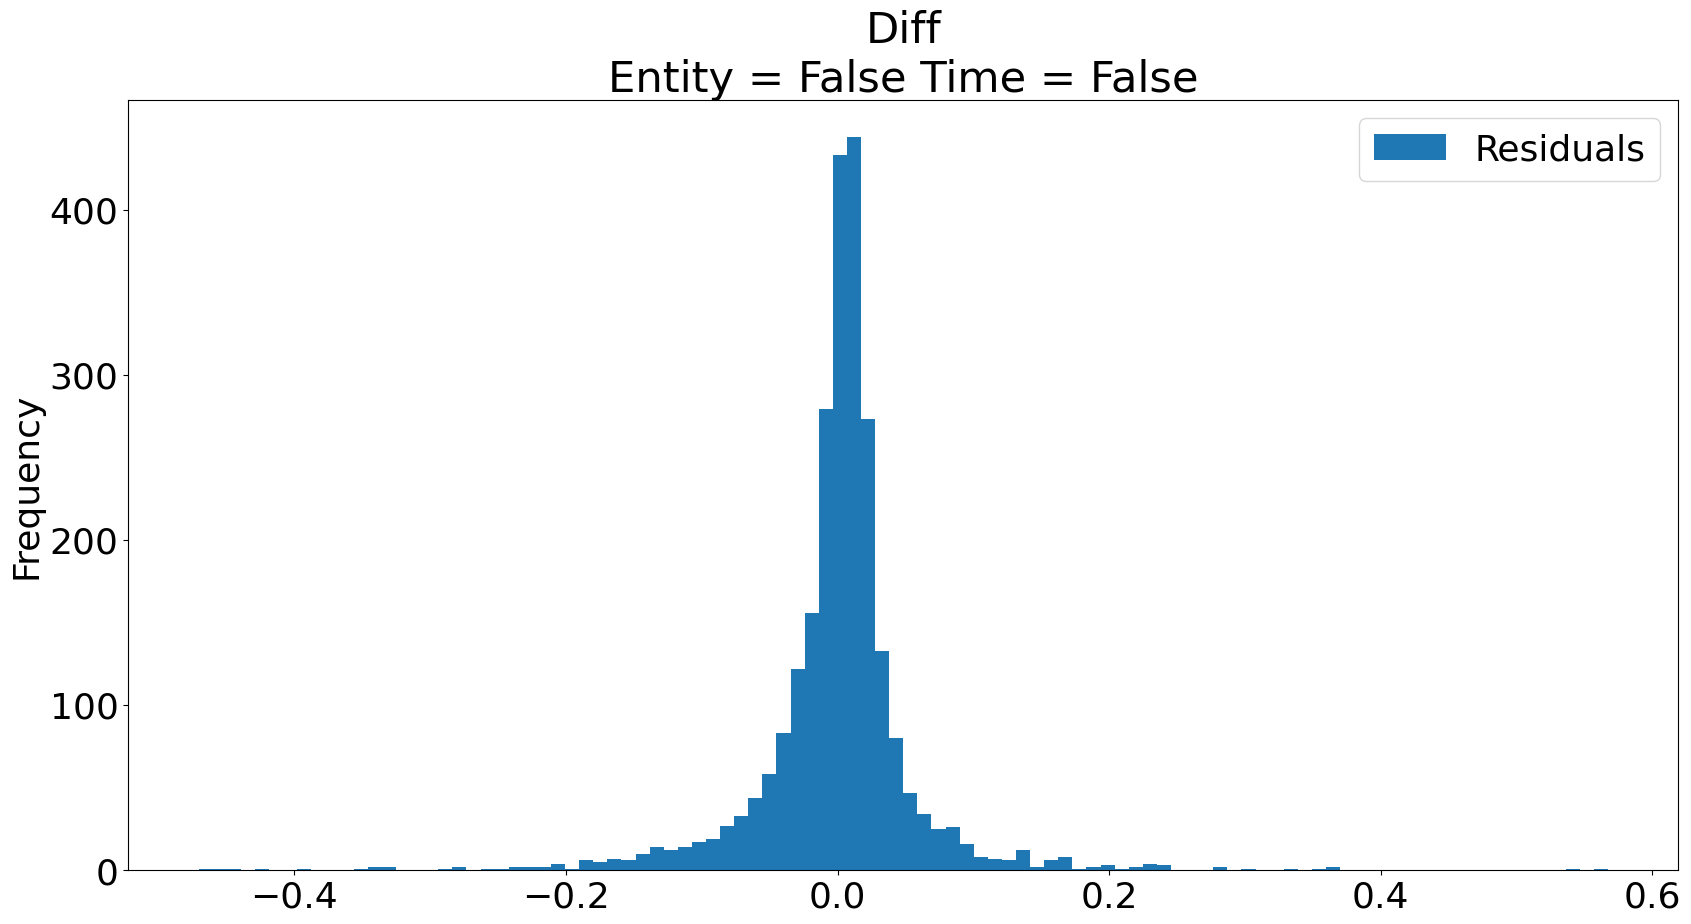

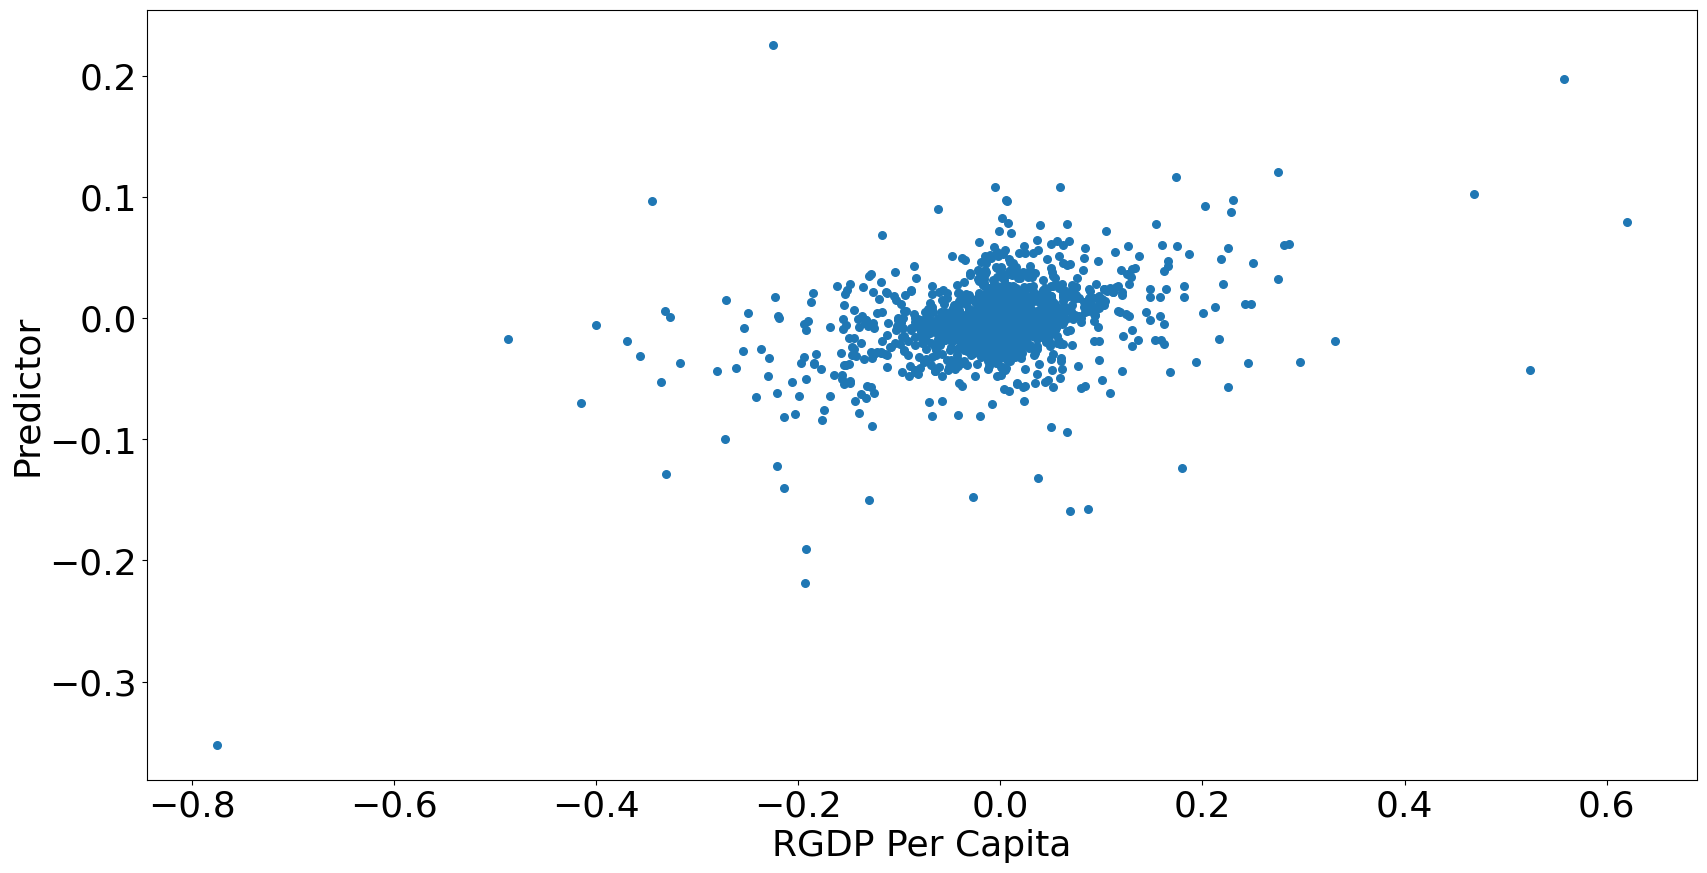

In [51]:
def plot_residuals(df, y_name, time = False, entity = False):
    fig, ax = plt.subplots(figsize = (20,10))
    df[["Residuals"]].plot.hist(bins = 100, ax = ax)
    plt.title(f"{key}\nEntity = {entity} Time = {time}")
    plt.show()
    plt.close()

    fig, ax = plt.subplots(figsize = (20,10))
    df.plot.scatter(x = y_name, y = "Predictor",
                    s = 30, ax = ax)
    plt.show()
    plt.close()

X_names = ["Size of Government", 
          "Legal System and Property Rights", 
          "Sound Money",
          "Freedom to Trade Internationally",
          "Regulation",
          "RGDP Per Capita Lag"]
y_name = ["RGDP Per Capita"]
for key, df in data_dict.items():
    reg_data = df.dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    y = reg_data[y_name]
    print(key)
    results = sm.OLS(y, X).fit()
    reg_data["Predictor"] = results.predict()
    reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

    plot_residuals(reg_data, y_name = y_name[0])

    

In [39]:

entity = True
time = True
for key, df in data_dict.items():
    print(key)
    reg_data = df.copy()
    y = reg_data[y_name]
    X = reg_data[X_names]
    X["Constant"] = 1
    model = PanelOLS(y, X, entity_effects = entity, time_effects = time)
    results = model.fit(cov_type="clustered", cluster_entity = True)
    print(results)

Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0868
Estimator:                   PanelOLS   R-squared (Between):             -0.3628
No. Observations:                2577   R-squared (Within):               0.0714
Date:                Thu, Apr 25 2024   R-squared (Overall):             -0.0441
Time:                        13:26:44   Log-likelihood                    4495.8
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      38.001
Entities:                         153   P-value                           0.0000
Avg Obs:                       16.843   Distribution:                  F(6,2400)
Min Obs:                       2.0000                                           
Max Obs:                       19.000   F-statistic (robust):             9.1096
                       

C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\3462100899.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_11976\3462100899.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.1375
Estimator:                   PanelOLS   R-squared (Between):             -1.0283
No. Observations:                2523   R-squared (Within):               0.1484
Date:                Thu, Apr 25 2024   R-squared (Overall):              0.1345
Time:                        13:26:44   Log-likelihood                    3776.6
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      62.327
Entities:                         153   P-value                           0.0000
Avg Obs:                       16.490   Distribution:                  F(6,2346)
Min Obs:                       1.0000                                           
Max Obs:                       19.000   F-statistic (robust):             13.657
                            